In [257]:
#importing required libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [258]:
#import data from excel into python
E_commerce = pd.read_excel(r'E:\Project_Python\Ecommerce Analytics\E-com_data.xlsx')
E_commerce.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [259]:
E_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [260]:
#Feature Selection
E_commerce_data = E_commerce[['CustomerID','Item Code','InvoieNo','Date of purchase','Quantity','price per Unit','Price']]
print(E_commerce_data)

        CustomerID Item Code  InvoieNo Date of purchase  Quantity  \
0           4355.0     15734    398177       2017-10-29         6   
1           4352.0     14616    394422       2017-10-05         2   
2           4352.0     14614    394422       2017-10-12         2   
3           4352.0    85014B    388633       2017-08-22         3   
4           4352.0     15364    394422       2017-10-10         2   
...            ...       ...       ...              ...       ...   
537974         NaN    85194L    372313       2017-03-23         6   
537975         NaN     14693    367605       2017-02-06         2   
537976         NaN     14693    368246       2017-02-06         3   
537977         NaN    85194L    366891       2017-01-29        15   
537978         NaN     14693    391243       2017-09-17        20   

        price per Unit   Price  
0                321.0  1926.0  
1                870.0  1740.0  
2                933.0  1866.0  
3                623.0  1869.0  
4     

In [261]:
#ignore missing values w.r.t customer ID
E_commerce_data = E_commerce_data[pd.notnull(E_commerce_data['CustomerID'])]

In [262]:
#Rename misspelled column heading
E_commerce_data.rename(columns = {'InvoieNo':'InvoiceNo'}, inplace = True)
print(E_commerce_data)

        CustomerID Item Code  InvoiceNo Date of purchase  Quantity  \
0           4355.0     15734     398177       2017-10-29         6   
1           4352.0     14616     394422       2017-10-05         2   
2           4352.0     14614     394422       2017-10-12         2   
3           4352.0    85014B     388633       2017-08-22         3   
4           4352.0     15364     394422       2017-10-10         2   
...            ...       ...        ...              ...       ...   
537945        37.0     14693     402292       2017-11-28         1   
537946        37.0     14693     402292       2017-11-27         1   
537947        21.0     77618     363890       2016-12-21         8   
537948        21.0    85194L     363890       2016-12-21        36   
537949        21.0     14693     363890       2016-12-17        13   

        price per Unit   Price  
0                321.0  1926.0  
1                870.0  1740.0  
2                933.0  1866.0  
3                623.0  186

In [263]:
print(E_commerce_data.shape)

(404189, 7)


In [264]:
E_commerce_data.describe(include="all")

,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,price per Unit,Price
count,404189.000000,404189,404189.000000,404189,404189.000000,404189.000000,404189.000000
unique,NaN,3659,NaN,381,NaN,NaN,NaN
top,NaN,85123A,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,NaN,2064,NaN,2522,NaN,NaN,NaN
first,NaN,NaN,NaN,2016-12-02 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-19 00:00:00,NaN,NaN,NaN
mean,2181.909035,NaN,385648.404551,NaN,11.478576,341.448120,2474.108531
std,1252.681881,NaN,13107.422150,NaN,29.489655,427.238546,4891.346420
min,2.000000,NaN,361429.000000,NaN,-152.000000,2.000000,-10152.000000
25%,1207.000000,NaN,374194.000000,NaN,2.000000,158.000000,555.000000


In [265]:
#Hide warning 
import warnings
warnings.filterwarnings('ignore')

In [266]:
#Finding Missing Values
print(E_commerce_data.isnull().sum())

CustomerID          0
Item Code           0
InvoiceNo           0
Date of purchase    0
Quantity            0
price per Unit      0
Price               0
dtype: int64


In [267]:
E_commerce_data.duplicated().sum()

8

In [268]:
E_commerce_data = E_commerce_data.drop_duplicates()

In [269]:
print(E_commerce_data.shape)

(404181, 7)


In [270]:
negatives = len(E_commerce_data[(E_commerce_data.Price < 0)])

In [271]:
print(negatives)

8183


In [272]:
#To drop negative values.
E_commerce_data = E_commerce_data[~(E_commerce_data.Price<0)]

In [273]:
E_commerce_data.describe(include="all")

,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,price per Unit,Price
count,395998.000000,395998,395998.000000,395998,395998.000000,395998.000000,395998.000000
unique,NaN,3637,NaN,381,NaN,NaN,NaN
top,NaN,85123A,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,NaN,2024,NaN,2485,NaN,NaN,NaN
first,NaN,NaN,NaN,2016-12-02 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-19 00:00:00,NaN,NaN,NaN
mean,2186.423482,NaN,385683.406209,NaN,11.822648,338.627140,2554.930656
std,1252.325963,NaN,13107.505659,NaN,29.667004,424.303919,4903.426736
min,2.000000,NaN,361429.000000,NaN,1.000000,2.000000,12.000000
25%,1212.000000,NaN,374298.000000,NaN,2.000000,157.000000,598.000000


In [274]:
#To find latest and oldest date
E_commerce_data["Date of purchase"].max(),E_commerce_data["Date of purchase"].min()

(Timestamp('2017-12-19 00:00:00'), Timestamp('2016-12-02 00:00:00'))

In [275]:
print("Number of Unique customers:", E_commerce_data['CustomerID'].nunique())
print("Number of Unique Invoices:", E_commerce_data['InvoiceNo'].nunique())

Number of Unique customers: 4324
Number of Unique Invoices: 18305


In [276]:
#To find Recency
Data_Recency = E_commerce_data.groupby(by='CustomerID',
                        as_index=False)['Date of purchase'].max()
Data_Recency.columns = ['CustomerID', 'LatestPurchase']
recent_date = dt.datetime(2017,12,20)
Data_Recency['Recency'] = Data_Recency['LatestPurchase'].apply(
    lambda x: (recent_date - x).days)
Data_Recency.head()

,CustomerID,LatestPurchase,Recency
0,2.0,2017-12-16,4
1,3.0,2017-10-04,77
2,4.0,2017-12-01,19
3,5.0,2017-02-12,311
4,6.0,2017-11-13,37


In [277]:
#To find Frequency
Data_Frequency =  E_commerce_data.groupby(by=['CustomerID'], 
                           as_index=False)['InvoiceNo'].nunique()
Data_Frequency.columns = ['CustomerID', 'Frequency']
Data_Frequency.head()

,CustomerID,Frequency
0,2.0,7
1,3.0,4
2,4.0,1
3,5.0,1
4,6.0,7


In [278]:
#To find Monetary Value
Data_MonetaryValue = E_commerce_data.groupby(by='CustomerID', as_index=False)['Price'].sum()
Data_MonetaryValue.columns = ['CustomerID', 'Monetary_Value']
Data_MonetaryValue.head()

,CustomerID,Monetary_Value
0,2.0,553704.0
1,3.0,257404.0
2,4.0,176613.0
3,5.0,41976.0
4,6.0,166972.0


In [279]:
#Merging all three columns in one dataframe
RF = Data_Recency.merge(Data_Frequency, on='CustomerID')
RFM = RF.merge(Data_MonetaryValue, on='CustomerID').drop(columns = 'LatestPurchase') #Drop unnecessary column
RFM.head()

,CustomerID,Recency,Frequency,Monetary_Value
0,2.0,4,7,553704.0
1,3.0,77,4,257404.0
2,4.0,19,1,176613.0
3,5.0,311,1,41976.0
4,6.0,37,7,166972.0


<AxesSubplot:xlabel='Monetary_Value', ylabel='Density'>

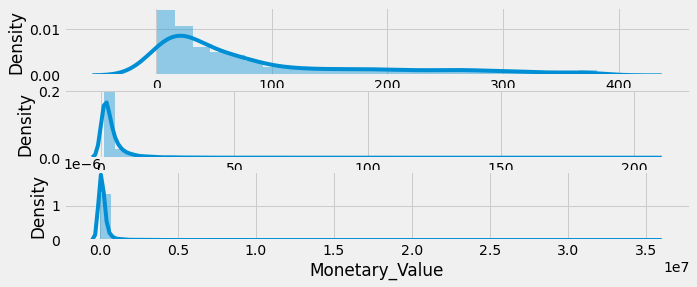

In [280]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,4))

plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary_Value'])

In [281]:
RFM.reset_index()

,index,CustomerID,Recency,Frequency,Monetary_Value
0,0,2.0,4,7,553704.0
1,1,3.0,77,4,257404.0
2,2,4.0,19,1,176613.0
3,3,5.0,311,1,41976.0
4,4,6.0,37,7,166972.0
...,...,...,...,...,...
4319,4319,4368.0,278,1,20480.0
4320,4320,4369.0,181,1,10774.0
4321,4321,4370.0,9,2,25177.0
4322,4322,4371.0,4,16,280608.0


In [282]:
RFM.describe(include='all')

,CustomerID,Recency,Frequency,Monetary_Value
count,4324.000000,4324.000000,4324.000000,4.324000e+03
mean,2185.346438,93.755319,4.233349,2.339841e+05
std,1261.594396,100.115549,7.583441,8.636663e+05
min,2.000000,1.000000,1.000000,3.880000e+02
25%,1092.750000,19.000000,1.000000,3.928800e+04
50%,2182.500000,52.000000,2.000000,8.614700e+04
75%,3279.250000,143.250000,5.000000,2.108338e+05
max,4372.000000,381.000000,206.000000,3.553619e+07


In [283]:
quantiles = RFM.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [284]:
RFM_Segment = RFM.copy()

In [285]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [286]:
RFM_Segment['R_quartile'] = RFM_Segment['Recency'].apply(RScore, args=('Recency',quantiles))
RFM_Segment['F_quartile'] = RFM_Segment['Frequency'].apply(FMScore, args=('Frequency',quantiles))
RFM_Segment['M_quartile'] = RFM_Segment['Monetary_Value'].apply(FMScore, args=('Monetary_Value',quantiles))

In [287]:
RFM_Segment.head(10)

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile
0,2.0,4,7,553704.0,1,1,1
1,3.0,77,4,257404.0,3,2,1
2,4.0,19,1,176613.0,1,4,2
3,5.0,311,1,41976.0,4,4,3
4,6.0,37,7,166972.0,2,1,2
5,7.0,208,1,9410.0,4,4,4
6,8.0,233,1,135550.0,4,4,2
7,9.0,215,1,65832.0,4,4,3
8,10.0,25,3,331601.0,2,2,1
9,11.0,34,1,771439.0,2,4,1


**Best Recency score = 1: Purchased very recently. Best Frequency score = 1: highest quantity purchases. Best Monetary score = 1: spent the most.**

In [288]:
RFM_Segment['RFM_Segment'] = RFM_Segment.R_quartile.map(str)+RFM_Segment.F_quartile.map(str)+RFM_Segment.M_quartile.map(str)
RFM_Segment.head()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_Segment
0,2.0,4,7,553704.0,1,1,1,111
1,3.0,77,4,257404.0,3,2,1,321
2,4.0,19,1,176613.0,1,4,2,142
3,5.0,311,1,41976.0,4,4,3,443
4,6.0,37,7,166972.0,2,1,2,212


In [289]:
RFM_Segment['RFM_Score'] = RFM_Segment[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
RFM_Segment.head()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,2.0,4,7,553704.0,1,1,1,111,3
1,3.0,77,4,257404.0,3,2,1,321,6
2,4.0,19,1,176613.0,1,4,2,142,7
3,5.0,311,1,41976.0,4,4,3,443,11
4,6.0,37,7,166972.0,2,1,2,212,5


In [290]:
RFM_Segment.describe(include='all')

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
count,4324.000000,4324.000000,4324.000000,4.324000e+03,4324.000000,4324.000000,4324.000000,4324,4324.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465,NaN
mean,2185.346438,93.755319,4.233349,2.339841e+05,2.490056,2.687789,2.500000,NaN,7.677845
std,1261.594396,100.115549,7.583441,8.636663e+05,1.124514,1.145096,1.118163,NaN,2.888483
min,2.000000,1.000000,1.000000,3.880000e+02,1.000000,1.000000,1.000000,NaN,3.000000
25%,1092.750000,19.000000,1.000000,3.928800e+04,1.000000,2.000000,1.750000,NaN,5.000000
50%,2182.500000,52.000000,2.000000,8.614700e+04,2.000000,3.000000,2.500000,NaN,8.000000
75%,3279.250000,143.250000,5.000000,2.108338e+05,3.250000,4.000000,3.250000,NaN,10.000000


In [295]:
#Assign loyalty level to each customer 
x=RFM_Segment['RFM_Score']
Bins=[0,5,8,10,x.max()]# doing these segregation on the basis of values (min,25%,50%,75%,max)
Binlabels=['Very Good Customer','Average Customer','Almost Lost Customer','Churn Customer']
cateogries=pd.cut(x,Bins,labels=Binlabels)

In [296]:
#creating new column in dataframe and storing the value
RFM_Segment['RFM_Levels']=cateogries

In [297]:
RFM_Segment=RFM_Segment.sort_values(by=['RFM_Score'],ascending=True)
RFM_Segment

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Levels
0,2.0,4,7,553704.0,1,1,1,111,3,Very Good Customer
189,193.0,6,9,245289.0,1,1,1,111,3,Very Good Customer
3392,3429.0,18,10,647148.0,1,1,1,111,3,Very Good Customer
3390,3427.0,13,7,258866.0,1,1,1,111,3,Very Good Customer
3387,3424.0,5,6,225955.0,1,1,1,111,3,Very Good Customer
...,...,...,...,...,...,...,...,...,...,...
259,264.0,333,1,6252.0,4,4,4,444,12,Churn Customer
4163,4208.0,293,1,10716.0,4,4,4,444,12,Churn Customer
3084,3118.0,365,1,18035.0,4,4,4,444,12,Churn Customer
990,1001.0,183,1,10575.0,4,4,4,444,12,Churn Customer


In [298]:
rfm_level_agg = RFM_Segment.groupby('RFM_Levels').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)

In [299]:
rfm_level_agg

Recency Frequency Monetary_Value      
                        mean      mean           mean count
RFM_Levels                                                 
Very Good Customer      19.0      10.2       638075.8  1180
Average Customer        59.7       3.1       138386.8  1246
Almost Lost Customer   103.6       1.5        61393.1   977
Churn Customer         225.1       1.1        28672.1   921

**Some useful insights for future marketing strategies**

In [300]:
print("Best Customers: ",len(RFM_Segment[RFM_Segment['RFM_Segment']=='111'])) 
print("Loyal Customers: ",len(RFM_Segment[RFM_Segment['F_quartile']==1]))
print("Big Spenders: ",len(RFM_Segment[RFM_Segment['M_quartile']==1]))

Best Customers:  465
Loyal Customers:  863
Big Spenders:  1081


**Suggested marketing strategies on segmented customers:
Very Good Customers- Discounts, early access of new products, and loyalty programs.(RFM Score 3-5)
Average Customer - Coupons or Cashback rewards, low delivery charges (RFM Score 6-8)
Almost Lost Customer- Aggresive price incentives (RFM Score 9-10)
Churn Customers-Don’t spend too much trying to re-acquire them.(RFM Score 11-12)**

In [301]:
RFM_Segment.to_excel(r"RFM_Segments.xlsx",index=True)

# K-Means Clustering

In [302]:
RFM_new = RFM[['Recency','Frequency','Monetary_Value']]
print(RFM_new.describe())

           Recency    Frequency  Monetary_Value
count  4324.000000  4324.000000    4.324000e+03
mean     93.755319     4.233349    2.339841e+05
std     100.115549     7.583441    8.636663e+05
min       1.000000     1.000000    3.880000e+02
25%      19.000000     1.000000    3.928800e+04
50%      52.000000     2.000000    8.614700e+04
75%     143.250000     5.000000    2.108338e+05
max     381.000000   206.000000    3.553619e+07


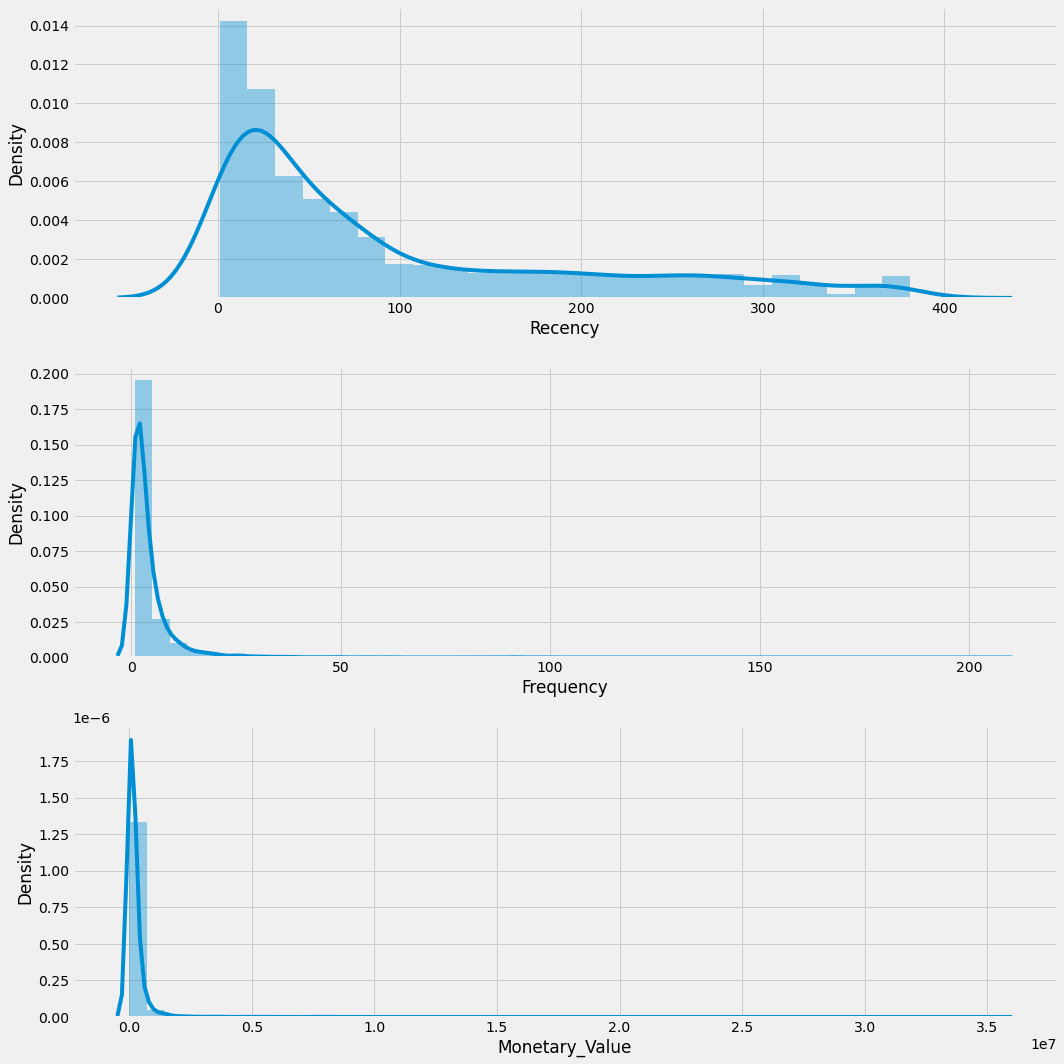

In [303]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(RFM_new.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(RFM_new.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(RFM_new.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

# Preprocessing

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. Add a small constant as log transformation demands all the values to be positive.

In [304]:
from scipy import stats
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: -0.3033533194860082, : SkewtestResult(statistic=-7.981630554448922, pvalue=1.444127231295594e-15)
Frequency's: Skew: 1.2018009061437023, : SkewtestResult(statistic=25.908866886735293, pvalue=5.291179903383846e-148)
Monetary_Value's: Skew: 0.25852327980839435, : SkewtestResult(statistic=6.841445819205799, pvalue=7.839785619964004e-12)


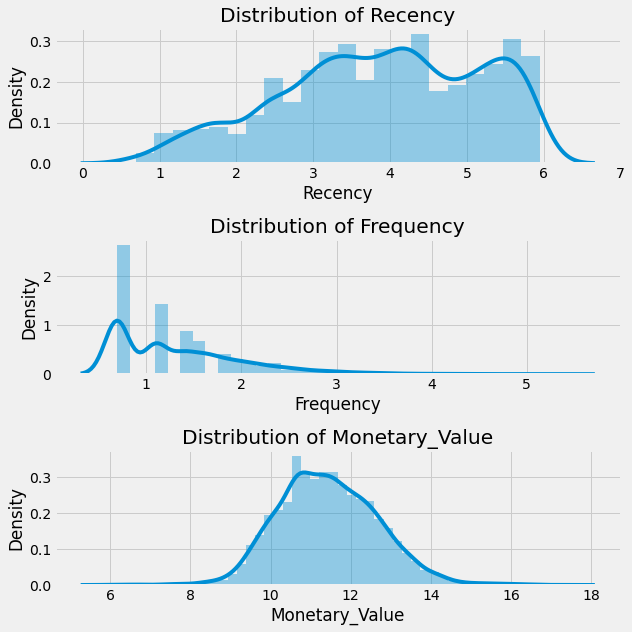

In [305]:
#Performing Log Transformation to reduce skewness in data.
RFM_log = np.log(RFM_new+1)

#Plotting to check whether the skewness is reduced or not
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(RFM_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_log,'Monetary_Value')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [306]:
RFM_log.skew()

Recency          -0.303459
Frequency         1.202218
Monetary_Value    0.258613
dtype: float64

In [307]:
RFM_log.describe()

,Recency,Frequency,Monetary_Value
count,4324.000000,4324.000000,4324.000000
mean,3.882934,1.341089,11.429037
std,1.281343,0.681077,1.245210
min,0.693147,0.693147,5.963579
25%,2.995732,0.693147,10.578700
50%,3.970292,1.098612,11.363822
75%,4.971543,1.791759,12.258830
max,5.945421,5.332719,17.386062


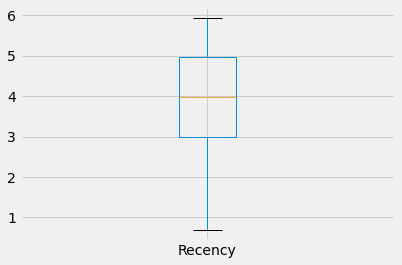

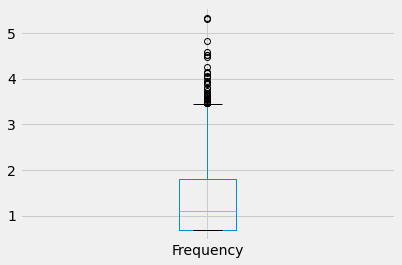

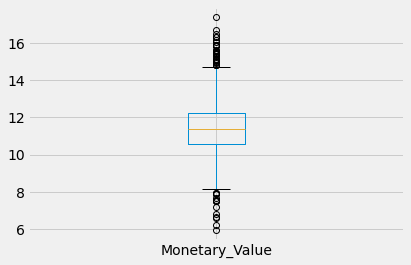

In [308]:
#To find outliers in data
for x in RFM_log.columns:
    RFM_log.boxplot(column=x)
    plt.show()

In [309]:
#treating outliers for frequency
q1 = RFM_log['Frequency'].quantile(0.25)
q3 = RFM_log['Frequency'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
high = q3+1.5*iqr #acceptable range # quartile range
print(high)

3.439677902230219


In [310]:
#Capping Frequency value
RFM_log.loc[RFM_log["Frequency"] >high, "Frequency"] = high

In [311]:
#treating outliers for Monetary Value
q1 = RFM_log['Monetary_Value'].quantile(0.25)
q3 = RFM_log['Monetary_Value'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range # quartile range
print(low)
print(high)

8.058504756489594
14.779024940437349


In [312]:
#Capping Monetary value
RFM_log.loc[RFM_log["Monetary_Value"] <low, "Monetary_Value"] = low
RFM_log.loc[RFM_log["Monetary_Value"] >high, "Monetary_Value"] = high

In [313]:
RFM_log.describe(include='all')

,Recency,Frequency,Monetary_Value
count,4324.000000,4324.000000,4324.000000
mean,3.882934,1.336626,11.425677
std,1.281343,0.663995,1.215988
min,0.693147,0.693147,8.058505
25%,2.995732,0.693147,10.578700
50%,3.970292,1.098612,11.363822
75%,4.971543,1.791759,12.258830
max,5.945421,3.439678,14.779025


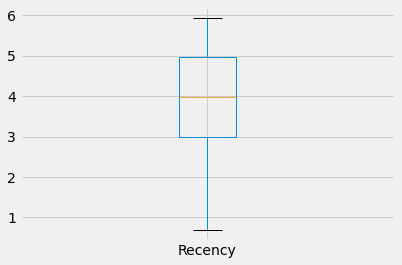

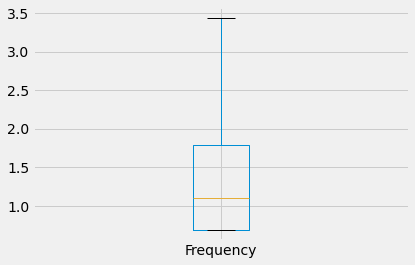

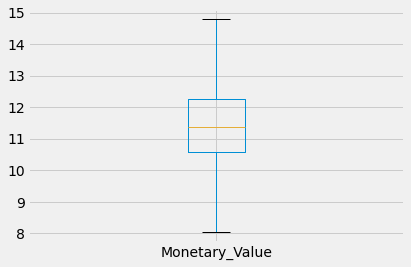

In [314]:
#Post outlier treatment checking for outliers
for x in RFM_log.columns:
    RFM_log.boxplot(column=x)
    plt.show()

# Implementation of K-Means

In [315]:
#To convert dataframe into an array
x=RFM_log.values[:,0:2] #<== Change value from 2 to 3 if you want to consider Monetary value as well.

**[:,0:2] We are taking only Recency & Frequency values. If we take Monetary value then it will affect our cluster formation i.e. clusters formed will have overlapping datapoints.**

In [316]:
x

array([[1.60943791, 2.07944154],
       [4.35670883, 1.60943791],
       [2.99573227, 0.69314718],
       ...,
       [2.30258509, 1.09861229],
       [1.60943791, 2.83321334],
       [3.80666249, 1.38629436]])

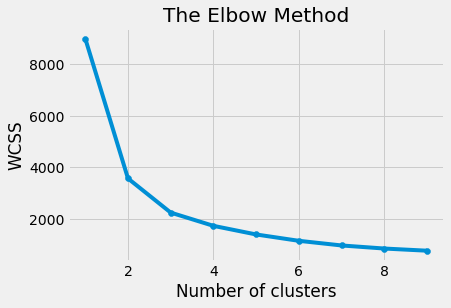

In [317]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state =10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #inertia -> Sum of squared error
plt.plot(range(1, 10),wcss)
plt.scatter(range(1, 10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [318]:
print(wcss)

[9003.636554104552, 3571.077373096242, 2245.3181920184893, 1730.8144197930017, 1395.7628361486431, 1149.5340733798857, 968.9234906469774, 849.455323275519, 765.3701357566433]


We choose number of Clusters=3

In [319]:
kmeans = KMeans(n_clusters=3, random_state=10)
y_pred=kmeans.fit_predict(x)

In [320]:
y_pred

array([2, 0, 0, ..., 2, 2, 0])

In [321]:
# Assign the clusters to datamart
RFM_log['Clusters'] = y_pred

In [322]:
RFM_log.Clusters.unique()

array([2, 0, 1])

In [323]:
RFM_log.head(10)

,Recency,Frequency,Monetary_Value,Clusters
0,1.609438,2.079442,13.224387,2
1,4.356709,1.609438,12.458406,0
2,2.995732,0.693147,12.081722,0
3,5.743003,0.693147,10.644877,1
4,3.637586,2.079442,12.025587,0
5,5.342334,0.693147,9.149634,1
6,5.455321,0.693147,11.817103,1
7,5.375278,0.693147,11.094877,1
8,3.258097,1.386294,12.711691,0
9,3.555348,0.693147,13.556014,0


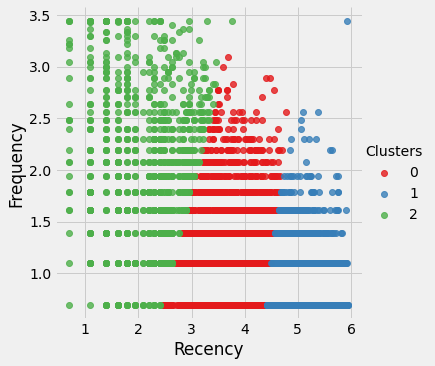

In [324]:
sns.lmplot(data=RFM_log,x='Recency',y='Frequency',fit_reg=False, #No regression line
          hue='Clusters',palette="Set1")
plt.show()

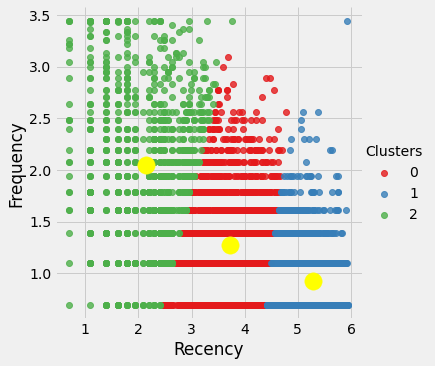

In [325]:
sns.lmplot(data=RFM_log,x='Recency',y='Frequency',fit_reg=False, #No regression line
          hue='Clusters',palette="Set1")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'yellow')
plt.show()

<AxesSubplot:ylabel='count'>

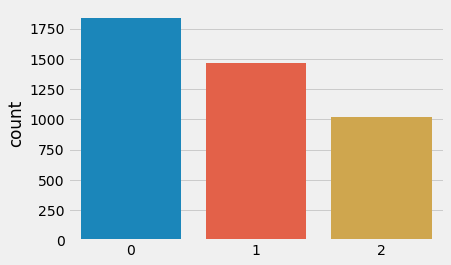

In [326]:
sns.countplot(y_pred)

**Plot below mentioned scatterplot only if you have taken monetary value in array 'x'**

In [327]:
# 3d scatterplot using plotly
#Scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Monetary Value'),zaxis = dict(title  = 'Frequency'))

# kmeans.labels_ is nothing but the predicted clusters i.e y_pred
#labels = kmeans.labels_
#trace = go.Scatter3d(x=x[:, 0], y=x[:, 2], z=x[:, 1], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
#layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
#data = [trace]
#fig = go.Figure(data = data, layout = layout)
#fig.show()

In [328]:
rfm_cluster_agg = RFM_log.groupby('Clusters').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(0)

In [329]:
rfm_cluster_agg

Recency Frequency Monetary_Value      
            mean      mean           mean count
Clusters                                       
0            4.0       1.0           11.0  1837
1            5.0       1.0           11.0  1470
2            2.0       2.0           12.0  1017

In [330]:
#Rename the cluster on the basis of all R,F & M values
RFM_log["Clusters"]=RFM_log.Clusters.map({0:"Medium Value Customer",1:"Low Value Customer",2:"High Value Customer"})

In [331]:
RFM_log.to_excel(r"ClusterSegments.xlsx",index=True)